## Grid Search

#### 그리드 서치란?
* 모델에 가장 적합한 하이퍼 파리머터를 찾기
* 사용자가 지정해 준 몇 가지 잠재적 Parameter들의 후보군 중에 가장 최적의 조합을 찾는다.

#### 그리드 서치(Grid Search)를 하는 이유
* 가장 우수한 성능을 보이는 모델의 하이퍼 파라미터를 찾기 위해
* Grid Search로서 관심 있는 매개변수들을 대상으로 가능한 모든 조합을 시도해보는 것을 통해 모델에서 중요한 일반화 성능이 높여주는 매개변수를 찾는다.

#### 그리드 서치의 단점
* 모든 경우의 수를 확인해 보기에 시간이 많이 걸린다.

### 01. 라이브러리 불러오기

In [58]:
from sklearn.model_selection import train_test_split
import mglearn
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [59]:
print(mglearn.__version__)
print(sklearn.__version__)

0.1.9
0.23.2


In [60]:
iris = load_iris()
X = iris.data
y = iris.target

# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X,  y, random_state=0)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(112, 4) (112,) (38, 4) (38,)


### 02. 모델 선택, 학습, 평가

In [61]:
model = DecisionTreeClassifier(max_depth=2, min_samples_split=3)
model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))

0.9642857142857143 0.8947368421052632


In [62]:
# 최적의 score 변수
best_score = 0

for depth in [2,3,4,5,6]:
    for min_samples in [5,10,30,50,100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples)
        tree.fit(X_train, y_train)
        
        # 테스트 세트로 의사결정트리를 평가
        score = tree.score(X_test, y_test)
        
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth':depth, 'min_samples_split':min_samples}

            print(best_score)
            print(best_parameters)
            
print("최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수 :", best_parameters)

0.8947368421052632
{'max_depth': 2, 'min_samples_split': 5}
0.9736842105263158
{'max_depth': 3, 'min_samples_split': 5}
최고 점수 : 0.97
최적 매개변수 : {'max_depth': 3, 'min_samples_split': 5}


* 여러가지 매개변수로 많이 시도해보고 테스트 세트 정확도가 가장 높은 조합을 선택.
* 하지만 이 정확도는 새로운 데이터까지 이어지지 않을 수 있다.
* score를 높은 점수를 얻기 위한 너무 많은 시도는 또한 과적합이 일어날 수 있다.

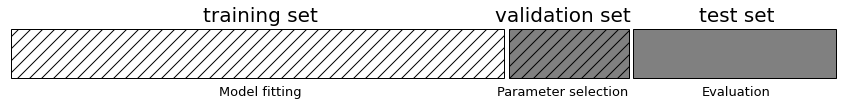

In [63]:
mglearn.plots.plot_threefold_split()

In [64]:
from sklearn.tree import DecisionTreeClassifier

# 학습(학습+검증), 테스트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)

In [65]:
# 학습+검증(X_trainvalid, y_trainvalid)을 활용하여 
# 학습, 검증로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, 
                                                      y_trainval,
                                                      random_state=0)

In [66]:
print("훈련 세트: {}, 검증 세트: {}, 테스트 세트: {}".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]  ))

훈련 세트: 84, 검증 세트: 28, 테스트 세트: 38


In [67]:
# 최적의 score 변수
best_score = 0

for depth in [2,3,4,5,6]:
    for min_samples in [5,10,30,50,100]:
        # 매개변수의 각 조합에 대해 트리를 훈련
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples)
        tree.fit(X_train, y_train)
        
        # 테스트 세트로 트리를 평가
        score = tree.score(X_test, y_test)
        
        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth':depth, 'min_samples_split':min_samples}

            print(best_score)
            print(best_parameters)

# 학습용 세트와 검증 세트를 합쳐 모델을 다시 만든 후,
# 테스트 세트를 사용해 평가합니다.
tree = DecisionTreeClassifier(**best_parameters)
tree.fit(X_trainval, y_trainval)
test_score = tree.score(X_test, y_test)
            
print("검증 세트에서 최고 점수 : {:.2f}".format(best_score))
print("최적 매개변수 : ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수 : {:.2f}".format(test_score))

0.8947368421052632
{'max_depth': 2, 'min_samples_split': 5}
0.9736842105263158
{'max_depth': 3, 'min_samples_split': 5}
검증 세트에서 최고 점수 : 0.97
최적 매개변수 :  {'max_depth': 3, 'min_samples_split': 5}
최적 매개변수에서 테스트 세트 점수 : 0.97


In [68]:
import numpy as np

In [69]:
for depth in [2,3,4,5,6]:
    for min_samples in [5,10,30,50,100]:
        # 매개변수의 각 조합에 대해 트리를 훈련
        tree = DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples)
        
        # 교차 검증을 적용합니다. 
        scores =  cross_val_score(tree, X_trainval, y_trainval, cv=5)
        
        # 교차 검증 정확도의 평균을 계산.
        score = np.mean(scores)

        # 점수가 더 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth':depth, 'min_samples_split':min_samples}

In [70]:
# 학습용 세트와 검증 세트를 합쳐 모델을 다시 만든 후,
# 테스트 세트를 사용해 평가합니다.
tree = DecisionTreeClassifier(**best_parameters)
tree.fit(X_trainval, y_trainval)
test_score = tree.score(X_test, y_test)

print("최적 매개변수 : ", best_parameters)
print("최적 매개변수에서 테스트 세트 점수 : {:.2f}".format(test_score))

최적 매개변수 :  {'max_depth': 3, 'min_samples_split': 5}
최적 매개변수에서 테스트 세트 점수 : 0.97


In [71]:
# 매개변수 
param_grid = {'max_depth':[2,3,4,5,6],
              'min_samples_split':[5,10,30,50,100] }
print("매개변수 그리드 :\n", param_grid)

매개변수 그리드 :
 {'max_depth': [2, 3, 4, 5, 6], 'min_samples_split': [5, 10, 30, 50, 100]}


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_search = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid, cv=5, return_train_score=True)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [5, 10, 30, 50, 100]},
             return_train_score=True)

In [73]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)

In [74]:
# 찾기 학습
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [5, 10, 30, 50, 100]},
             return_train_score=True)

In [75]:
print("최적 매개변수 :", grid_search.best_params_)
print("최고 교차 검증 점수 : {:.4f}".format(grid_search.best_score_))

최적 매개변수 : {'max_depth': 4, 'min_samples_split': 5}
최고 교차 검증 점수 : 0.9731


In [76]:
# 훈련 후, 테스트로 적용 후, 점수
grid_search.score(X_test, y_test)

0.9736842105263158

In [77]:
print("최적 매개변수 :", grid_search.best_params_)
print("최고 교차 검증 점수 : {:.2f}".format(grid_search.best_score_))

### 교차 검증 중, 최고 성능 모델 확인
print("최고 성능 모델 :\n", grid_search.best_estimator_)

최적 매개변수 : {'max_depth': 4, 'min_samples_split': 5}
최고 교차 검증 점수 : 0.97
최고 성능 모델 :
 DecisionTreeClassifier(max_depth=4, min_samples_split=5)


In [78]:
import pandas as pd
pd.set_option('display.max_columns', None)

# DataFrame으로 변환
results = pd.DataFrame(grid_search.cv_results_)
results.shape

(25, 22)

In [79]:
# 전체 행을 출력
display(np.transpose(results.head(25) ))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.00119619,0.000997734,0.000997591,0.00099721,0.000398684,0.000998926,0.00140376,0.000790834,0.000392771,0.000803947,0.000994635,0.000997114,0.000597906,0.000598621,0.000804281,0.000598145,0.000798273,0.000790691,0.000591326,0.000598001,0.000797939,0.000805521,0.000804138,0.000605202,0.000398731
std_fit_time,0.00039766,1.29187e-06,1.24709e-06,2.58374e-06,0.000488286,1.57717e-06,0.00049849,0.000396164,0.000481179,0.000402199,0.000631457,1.94512e-06,0.000488188,0.000488773,0.000402358,0.000488383,0.000399137,0.000395536,0.000482984,0.000488266,0.000398972,0.000402995,0.000402316,0.000494319,0.000488344
mean_score_time,0.000597572,0.000398827,0.00039835,0.000199747,0.000598955,0.000199223,0.000798416,0.000199461,0.000406265,0.000798225,0.000199318,0.000206327,0.000599003,0.000199413,0.000199366,0.000399542,0.000405598,0.000199556,0.000405169,0.000310278,0.00039916,0.000391388,0.000199509,0.000199509,0.000598812
std_score_time,0.000487921,0.000488461,0.000487881,0.000399494,0.000489045,0.000398445,0.00116396,0.000398922,0.000497696,0.000399114,0.000398636,0.000412655,0.000489084,0.000398827,0.000398731,0.00048934,0.000496863,0.000399113,0.000496323,0.000405035,0.00048887,0.000479491,0.000399017,0.000399017,0.000488928
param_max_depth,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,6,6,6,6,6
param_min_samples_split,5,10,30,50,100,5,10,30,50,100,5,10,30,50,100,5,10,30,50,100,5,10,30,50,100
params,"{'max_depth': 2, 'min_samples_split': 5}","{'max_depth': 2, 'min_samples_split': 10}","{'max_depth': 2, 'min_samples_split': 30}","{'max_depth': 2, 'min_samples_split': 50}","{'max_depth': 2, 'min_samples_split': 100}","{'max_depth': 3, 'min_samples_split': 5}","{'max_depth': 3, 'min_samples_split': 10}","{'max_depth': 3, 'min_samples_split': 30}","{'max_depth': 3, 'min_samples_split': 50}","{'max_depth': 3, 'min_samples_split': 100}","{'max_depth': 4, 'min_samples_split': 5}","{'max_depth': 4, 'min_samples_split': 10}","{'max_depth': 4, 'min_samples_split': 30}","{'max_depth': 4, 'min_samples_split': 50}","{'max_depth': 4, 'min_samples_split': 100}","{'max_depth': 5, 'min_samples_split': 5}","{'max_depth': 5, 'min_samples_split': 10}","{'max_depth': 5, 'min_samples_split': 30}","{'max_depth': 5, 'min_samples_split': 50}","{'max_depth': 5, 'min_samples_split': 100}","{'max_depth': 6, 'min_samples_split': 5}","{'max_depth': 6, 'min_samples_split': 10}","{'max_depth': 6, 'min_samples_split': 30}","{'max_depth': 6, 'min_samples_split': 50}","{'max_depth': 6, 'min_samples_split': 100}"
split0_test_score,0.956522,0.956522,0.956522,0.956522,0.347826,1,1,0.956522,0.956522,0.347826,1,1,0.956522,0.956522,0.347826,1,1,0.956522,0.956522,0.347826,1,1,0.956522,0.956522,0.347826
split1_test_score,0.913043,0.913043,0.913043,0.913043,0.347826,0.913043,0.913043,0.913043,0.913043,0.347826,0.956522,0.913043,0.913043,0.913043,0.347826,0.913043,0.913043,0.913043,0.913043,0.347826,0.956522,0.913043,0.913043,0.913043,0.347826
split2_test_score,1,1,1,1,0.363636,1,1,1,1,0.363636,1,1,1,1,0.363636,1,1,1,1,0.363636,1,1,1,1,0.363636


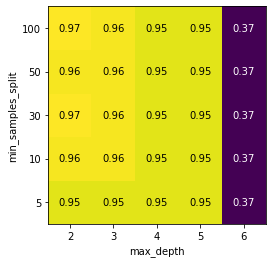

In [80]:
scores = np.array(results.mean_test_score).reshape(5,5)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, 
                      xlabel='max_depth', xticklabels=param_grid['max_depth'],
                      ylabel='min_samples_split', yticklabels=param_grid['min_samples_split'],
                      cmap='viridis'            
                      )

In [81]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [82]:
# 매개변수 그리드
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100] }

grid_search = GridSearchCV(SVC(), 
                           param_grid, cv=5, return_train_score=True)
grid_search

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [83]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                                    iris.target,
                                                    random_state=0)

# 찾기 학습
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

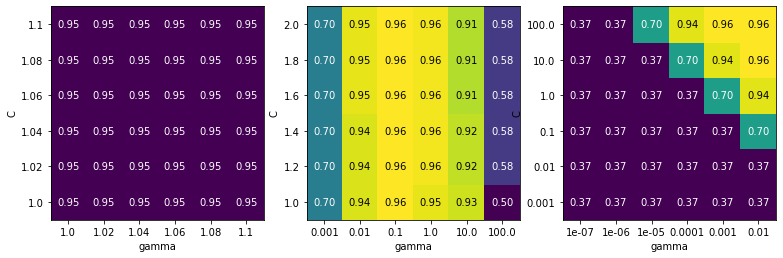

In [84]:
fig, axes = plt.subplots(1,3, figsize=(13,5))

param_grid_linear = {'C':np.linspace(1.0, 1.1, 6),
                     'gamma': np.linspace(1.0, 1.1, 6) }

param_grid_one_log = {'C':np.linspace(1,2,6), 
                     'gamma': np.logspace(-3,2,6) }

param_grid_range = {'C': np.logspace(-3,2,6),
                    'gamma': np.logspace(-7,-2,6) }

for param_grid, ax in zip([param_grid_linear,
                            param_grid_one_log,
                            param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6,6)
    

    # 교차 검증 평균 점수 히트맵 그래프
    scores_image = mglearn.tools.heatmap(scores, 
                      xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'],
                      cmap='viridis', ax=ax                                       
                      )

## Santander 고객 만족 분석

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [86]:
train = pd.read_csv("C:/Users/gram/Documents/★중급반/data/santander/train.csv", encoding='latin-1')
test = pd.read_csv("C:/Users/gram/Documents/★중급반/data/santander/test.csv", encoding='latin-1')
sub = pd.read_csv("C:/Users/gram/Documents/★중급반/data/santander/sample_submission.csv")

train.shape, test.shape, sub.shape

((76020, 371), (75818, 370), (75818, 2))

In [87]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [89]:
cnt=0
for one in train.columns:
    print(one, end="  ")
    cnt += 1
    if cnt%20==0:
        print()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  imp_op_var40_ult1  imp_op_var41_comer_ult1  imp_op_var41_comer_ult3  imp_op_var41_efect_ult1  imp_op_var41_efect_ult3  imp_op_var41_ult1  imp_op_var39_efect_ult1  imp_op_var39_efect_ult3  imp_op_var39_ult1  imp_sal_var16_ult1  
ind_var1_0  ind_var1  ind_var2_0  ind_var2  ind_var5_0  ind_var5  ind_var6_0  ind_var6  ind_var8_0  ind_var8  ind_var12_0  ind_var12  ind_var13_0  ind_var13_corto_0  ind_var13_corto  ind_var13_largo_0  ind_var13_largo  ind_var13_medio_0  ind_var13_medio  ind_var13  
ind_var14_0  ind_var14  ind_var17_0  ind_var17  ind_var18_0  ind_var18  ind_var19  ind_var20_0  ind_var20  ind_var24_0  ind_var24  ind_var25_cte  ind_var26_0  ind_var26_cte  ind_var26  ind_var25_0  ind_var25  ind_var27_0  ind_var28_0  ind_var28  
ind_var27  ind_var29_0  ind_var29  ind_var30_0  ind_var30  ind_var31_0 

In [90]:
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [91]:
train['TARGET'].value_counts()[0]

73012

In [92]:
satified = train['TARGET'].value_counts()[0]    # 만족
unsatified = train['TARGET'].value_counts()[1]  # 불만족
all_count = train['TARGET'].count()

print("{:.3f}% {:.3f}%".format( (satified/all_count) * 100 , 
                               (unsatified/all_count) * 100 ) )

96.043% 3.957%


In [93]:
train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [94]:
train['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 177           1
 87            1
 151           1
 215           1
 191           1
Name: var3, Length: 208, dtype: int64

In [95]:
# -999999를 가장 많은 나온 값으로 변경
train['var3'].replace(-999999, 2, inplace=True)

In [96]:
# 실제 확인
train.loc[ train['var3']==-999999, : ]

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10

In [97]:
## ID 열을 삭제
# train.drop('ID', axis=1, inplace=True)
train = train.loc[  :, "var3":  ]
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

In [98]:
# 피처와 레이블를 지정.
# TARGET를 제외한 열을 입력으로(X), TARGET열을 y로 지정
X = train.iloc[:, :-1]
y = train['TARGET']

X.shape, y.shape

((76020, 369), (76020,))

In [99]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, 
                                                     stratify=y,
                                                     test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60816, 369), (15204, 369), (60816,), (15204,))

In [100]:
y_test[0:10]

19379    0
66921    0
12415    0
9735     0
17997    0
67089    0
63376    0
6461     0
33577    0
59255    0
Name: TARGET, dtype: int64

In [101]:
## target(레이블) 분포비율
print( "학습용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )
print( "테스트용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )

학습용 레이블 분포 비율 : 
 0    0.960438
1    0.039562
Name: TARGET, dtype: float64
테스트용 레이블 분포 비율 : 
 0    0.960438
1    0.039562
Name: TARGET, dtype: float64


In [102]:
%%time

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_model = XGBClassifier(n_estimators=500, random_state=156)
xgb_model.fit(X_train, y_train, 
              early_stopping_rounds=100,
              eval_metric='auc', 
              eval_set=[(X_train, y_train), (X_test, y_test)])

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82570	validation_1-auc:0.79283
[1]	validation_0-auc:0.84010	validation_1-auc:0.80737
[2]	validation_0-auc:0.84361	validation_1-auc:0.81021
[3]	validation_0-auc:0.84783	validation_1-auc:0.81287
[4]	validation_0-auc:0.85123	validation_1-auc:0.81469
[5]	validation_0-auc:0.85518	validation_1-auc:0.81860
[6]	validation_0-auc:0.85922	validation_1-auc:0.81977
[7]	validation_0-auc:0.86238	validation_1-auc:0.82034
[8]	validation_0-auc:0.86570	validation_1-auc:0.82147
[9]	validation_0-auc:0.86798	validation_1-auc:0.82301
[10]	validation_0-auc:0.87104	validation_1-auc:0.82379
[11]	validation_0-auc:0.87448	validation_1-auc:0.82456
[12]	validation_0-auc:0.87687	validation_1-auc:0.82401
[13]	validation_0-auc:0.87918	validation_1-auc:0.82467
[14]	validation_0-auc:0.88081	validation_1-auc:0.82508
[15]	validation_0-auc:0.88331	validation_1-auc:0.82379
[16]	validation_0-auc:0.88569	validation_1-auc:0.82457
[17]	validation_0-auc:0.88674	validation_1-auc:0.82453
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, ...)

In [103]:
# 0의 예측 확률, 1의 예측 확률
pred_prob = xgb_model.predict_proba(X_test)[:, 1]
pred_prob

array([0.00690398, 0.02649283, 0.01910355, ..., 0.01988643, 0.01178615,
       0.00611465], dtype=float32)

In [104]:
# 실제값(y_test)와 예측값(pred_prob)
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

ROC AUC : 0.8251


In [105]:
pred_01 = pred_prob > 0.1
pred_01

array([False, False, False, ..., False, False, False])

In [106]:
# 실제값(y_test)와 예측값(pred_prob)
xgb_roc_score = roc_auc_score(y_test, pred_01, average='macro')
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

ROC AUC : 0.7161


In [107]:
%%time

from sklearn.model_selection import GridSearchCV

# 우선 하이퍼 파라미터 수행 속도를 향상을 위해 100으로
xgb_model1 = XGBClassifier(n_estimators=100, use_label_encoder=False)
params = {"max_depth":[5,7],
          "min_child_weight":[1,3],
          "colsample_bytree":[0.5, 0.75]}

gridcv = GridSearchCV(xgb_model1, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, 
            eval_metric='auc', 
            eval_set = [(X_train, y_train), (X_test, y_test)])

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
D:\Anaconda\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.81018	validation_1-auc:0.78188
[1]	validation_0-auc:0.82545	validation_1-auc:0.79768
[2]	validation_0-auc:0.83140	validation_1-auc:0.80216
[3]	validation_0-auc:0.83516	validation_1-auc:0.80198
[4]	validation_0-auc:0.83771	validation_1-auc:0.80506
[5]	validation_0-auc:0.84300	validation_1-auc:0.81035
[6]	validation_0-auc:0.84062	validation_1-auc:0.80790
[7]	validation_0-auc:0.84891	validation_1-auc:0.81507
[8]	validation_0-auc:0.85188	validation_1-auc:0.81522
[9]	validation_0-auc:0.85270	validation_1-auc:0.81168
[10]	validation_0-auc:0.85247	validation_1-auc:0.80830
[11]	validation_0-auc:0.85177	validation_1-auc:0.80637
[12]	validation_0-auc:0.85755	validation_1-auc:0.81189
[13]	validation_0-auc:0.86087	validation_1-auc:0.81560
[14]	validation_0-auc:0.86280	validation_1-auc:0.81838
[15]	validation_0-auc:0.86444	validation_1-auc:0.81759
[16]	validation_0-auc:0.86525	validation_1-auc:0.81930
[17]	validation_0-auc:0.86676	validation_1-auc:0.82054
[18]	validation_0-au

[33]	validation_0-auc:0.87650	validation_1-auc:0.81592
[34]	validation_0-auc:0.87670	validation_1-auc:0.81603
[35]	validation_0-auc:0.87694	validation_1-auc:0.81586
[36]	validation_0-auc:0.87715	validation_1-auc:0.81558
[37]	validation_0-auc:0.87735	validation_1-auc:0.81523
[38]	validation_0-auc:0.87844	validation_1-auc:0.81549
[39]	validation_0-auc:0.87922	validation_1-auc:0.81505
[40]	validation_0-auc:0.87920	validation_1-auc:0.81484
[41]	validation_0-auc:0.88020	validation_1-auc:0.81441
[42]	validation_0-auc:0.88077	validation_1-auc:0.81392
[43]	validation_0-auc:0.88088	validation_1-auc:0.81404
[44]	validation_0-auc:0.88135	validation_1-auc:0.81364
[45]	validation_0-auc:0.88161	validation_1-auc:0.81319
[46]	validation_0-auc:0.88176	validation_1-auc:0.81332
[47]	validation_0-auc:0.88191	validation_1-auc:0.81307
[0]	validation_0-auc:0.81016	validation_1-auc:0.78166
[1]	validation_0-auc:0.82562	validation_1-auc:0.79846
[2]	validation_0-auc:0.83299	validation_1-auc:0.80352
[3]	validatio

[22]	validation_0-auc:0.86831	validation_1-auc:0.81976
[23]	validation_0-auc:0.86905	validation_1-auc:0.82028
[24]	validation_0-auc:0.86951	validation_1-auc:0.81991
[25]	validation_0-auc:0.86963	validation_1-auc:0.81991
[26]	validation_0-auc:0.87078	validation_1-auc:0.81925
[27]	validation_0-auc:0.87104	validation_1-auc:0.81882
[28]	validation_0-auc:0.87171	validation_1-auc:0.81836
[29]	validation_0-auc:0.87273	validation_1-auc:0.81932
[30]	validation_0-auc:0.87281	validation_1-auc:0.81926
[31]	validation_0-auc:0.87374	validation_1-auc:0.82030
[32]	validation_0-auc:0.87393	validation_1-auc:0.82022
[33]	validation_0-auc:0.87423	validation_1-auc:0.82050
[34]	validation_0-auc:0.87513	validation_1-auc:0.82077
[35]	validation_0-auc:0.87548	validation_1-auc:0.82014
[36]	validation_0-auc:0.87611	validation_1-auc:0.81931
[37]	validation_0-auc:0.87627	validation_1-auc:0.81918
[38]	validation_0-auc:0.87710	validation_1-auc:0.81904
[39]	validation_0-auc:0.87730	validation_1-auc:0.81933
[40]	valid

[21]	validation_0-auc:0.88880	validation_1-auc:0.81284
[22]	validation_0-auc:0.88992	validation_1-auc:0.81310
[23]	validation_0-auc:0.89090	validation_1-auc:0.81412
[24]	validation_0-auc:0.89129	validation_1-auc:0.81408
[25]	validation_0-auc:0.89188	validation_1-auc:0.81428
[26]	validation_0-auc:0.89345	validation_1-auc:0.81398
[27]	validation_0-auc:0.89403	validation_1-auc:0.81415
[28]	validation_0-auc:0.89406	validation_1-auc:0.81363
[29]	validation_0-auc:0.89430	validation_1-auc:0.81354
[30]	validation_0-auc:0.89492	validation_1-auc:0.81287
[31]	validation_0-auc:0.89536	validation_1-auc:0.81184
[32]	validation_0-auc:0.89589	validation_1-auc:0.81148
[33]	validation_0-auc:0.89605	validation_1-auc:0.81166
[34]	validation_0-auc:0.89670	validation_1-auc:0.81195
[0]	validation_0-auc:0.81917	validation_1-auc:0.79054
[1]	validation_0-auc:0.83371	validation_1-auc:0.80237
[2]	validation_0-auc:0.83966	validation_1-auc:0.80628
[3]	validation_0-auc:0.84137	validation_1-auc:0.80729
[4]	validation

[34]	validation_0-auc:0.88824	validation_1-auc:0.81491
[35]	validation_0-auc:0.88866	validation_1-auc:0.81474
[36]	validation_0-auc:0.88892	validation_1-auc:0.81443
[37]	validation_0-auc:0.88913	validation_1-auc:0.81384
[38]	validation_0-auc:0.89003	validation_1-auc:0.81332
[39]	validation_0-auc:0.89094	validation_1-auc:0.81239
[40]	validation_0-auc:0.89149	validation_1-auc:0.81224
[41]	validation_0-auc:0.89173	validation_1-auc:0.81155
[42]	validation_0-auc:0.89184	validation_1-auc:0.81089
[43]	validation_0-auc:0.89229	validation_1-auc:0.81159
[44]	validation_0-auc:0.89258	validation_1-auc:0.81194
[45]	validation_0-auc:0.89274	validation_1-auc:0.81197
[46]	validation_0-auc:0.89323	validation_1-auc:0.81175
[47]	validation_0-auc:0.89336	validation_1-auc:0.81125
[48]	validation_0-auc:0.89415	validation_1-auc:0.80987
[0]	validation_0-auc:0.81858	validation_1-auc:0.78761
[1]	validation_0-auc:0.82302	validation_1-auc:0.79326
[2]	validation_0-auc:0.83321	validation_1-auc:0.80485
[3]	validatio

[24]	validation_0-auc:0.87138	validation_1-auc:0.81933
[25]	validation_0-auc:0.87219	validation_1-auc:0.81845
[26]	validation_0-auc:0.87298	validation_1-auc:0.81779
[27]	validation_0-auc:0.87342	validation_1-auc:0.81777
[28]	validation_0-auc:0.87371	validation_1-auc:0.81761
[29]	validation_0-auc:0.87390	validation_1-auc:0.81768
[30]	validation_0-auc:0.87412	validation_1-auc:0.81781
[31]	validation_0-auc:0.87510	validation_1-auc:0.81668
[32]	validation_0-auc:0.87583	validation_1-auc:0.81674
[33]	validation_0-auc:0.87617	validation_1-auc:0.81656
[34]	validation_0-auc:0.87637	validation_1-auc:0.81651
[35]	validation_0-auc:0.87700	validation_1-auc:0.81610
[36]	validation_0-auc:0.87743	validation_1-auc:0.81545
[37]	validation_0-auc:0.87789	validation_1-auc:0.81503
[38]	validation_0-auc:0.87829	validation_1-auc:0.81376
[39]	validation_0-auc:0.87868	validation_1-auc:0.81375
[40]	validation_0-auc:0.88003	validation_1-auc:0.81407
[41]	validation_0-auc:0.88029	validation_1-auc:0.81347
[42]	valid

[17]	validation_0-auc:0.86333	validation_1-auc:0.81871
[18]	validation_0-auc:0.86429	validation_1-auc:0.81880
[19]	validation_0-auc:0.86506	validation_1-auc:0.81863
[20]	validation_0-auc:0.86616	validation_1-auc:0.81814
[21]	validation_0-auc:0.86728	validation_1-auc:0.81867
[22]	validation_0-auc:0.86766	validation_1-auc:0.81881
[23]	validation_0-auc:0.86825	validation_1-auc:0.81862
[24]	validation_0-auc:0.86841	validation_1-auc:0.81860
[25]	validation_0-auc:0.86864	validation_1-auc:0.81829
[26]	validation_0-auc:0.87021	validation_1-auc:0.81811
[27]	validation_0-auc:0.87084	validation_1-auc:0.81792
[28]	validation_0-auc:0.87109	validation_1-auc:0.81805
[29]	validation_0-auc:0.87130	validation_1-auc:0.81754
[30]	validation_0-auc:0.87168	validation_1-auc:0.81745
[31]	validation_0-auc:0.87224	validation_1-auc:0.81703
[32]	validation_0-auc:0.87288	validation_1-auc:0.81644
[33]	validation_0-auc:0.87317	validation_1-auc:0.81599
[34]	validation_0-auc:0.87376	validation_1-auc:0.81605
[35]	valid

[28]	validation_0-auc:0.89402	validation_1-auc:0.81246
[29]	validation_0-auc:0.89399	validation_1-auc:0.81257
[30]	validation_0-auc:0.89434	validation_1-auc:0.81169
[31]	validation_0-auc:0.89453	validation_1-auc:0.81188
[32]	validation_0-auc:0.89473	validation_1-auc:0.81231
[33]	validation_0-auc:0.89511	validation_1-auc:0.81136
[34]	validation_0-auc:0.89547	validation_1-auc:0.81144
[35]	validation_0-auc:0.89569	validation_1-auc:0.81111
[36]	validation_0-auc:0.89680	validation_1-auc:0.81057
[37]	validation_0-auc:0.89705	validation_1-auc:0.81036
[38]	validation_0-auc:0.89836	validation_1-auc:0.80991
[0]	validation_0-auc:0.82371	validation_1-auc:0.79441
[1]	validation_0-auc:0.83219	validation_1-auc:0.79713
[2]	validation_0-auc:0.83924	validation_1-auc:0.80071
[3]	validation_0-auc:0.84164	validation_1-auc:0.80063
[4]	validation_0-auc:0.84779	validation_1-auc:0.80814
[5]	validation_0-auc:0.85254	validation_1-auc:0.81182
[6]	validation_0-auc:0.85837	validation_1-auc:0.81536
[7]	validation_0-

[4]	validation_0-auc:0.85928	validation_1-auc:0.82168
[5]	validation_0-auc:0.86200	validation_1-auc:0.82167
[6]	validation_0-auc:0.86828	validation_1-auc:0.82437
[7]	validation_0-auc:0.87083	validation_1-auc:0.82401
[8]	validation_0-auc:0.87382	validation_1-auc:0.82327
[9]	validation_0-auc:0.87595	validation_1-auc:0.82066
[10]	validation_0-auc:0.87905	validation_1-auc:0.81807
[11]	validation_0-auc:0.87956	validation_1-auc:0.81437
[12]	validation_0-auc:0.88382	validation_1-auc:0.81954
[13]	validation_0-auc:0.88735	validation_1-auc:0.82120
[14]	validation_0-auc:0.88991	validation_1-auc:0.82252
[15]	validation_0-auc:0.89236	validation_1-auc:0.82231
[16]	validation_0-auc:0.89355	validation_1-auc:0.82367
[17]	validation_0-auc:0.89559	validation_1-auc:0.82306
[18]	validation_0-auc:0.89618	validation_1-auc:0.82374
[19]	validation_0-auc:0.89700	validation_1-auc:0.82346
[20]	validation_0-auc:0.89746	validation_1-auc:0.82414
[21]	validation_0-auc:0.89945	validation_1-auc:0.82335
[22]	validation_

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    